# TF-IDF clustering

In [3]:
!pip install pythainlp
!pip install pandas
!pip install numpy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 28.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = '/content/drive/MyDrive/Final_project/clean_data/combine_company.csv'

In [6]:
import pandas as pd
import numpy as np
from pythainlp.corpus import thai_stopwords

In [7]:
df = pd.read_csv(data)
frozen_stopword = thai_stopwords()

In [77]:
# Clean stop word and special charater
import string
import re
from pythainlp.tokenize import word_tokenize
list_stopword = [frozen_stopword]

def clean_tokenize(rec_text:str) -> list:
  # sample_text = rec_text
  # clean_token = sample_text.translate(str.maketrans('', '', string.punctuation))
  # clean_token = sample_text.translate(str.maketrans('', '', string.digits))
  clean_token = rec_text.lower()
  for pair in (('\n', ''), ('\t', ''), ('!', '')):
        clean_token =clean_token.replace(*pair)
  # text = text.strip()
  # text = text.lower()
  # temp = ""
  # for k in range(len(text)):
  #   if text[k] not in string.punctuation and (text[k] not in string.digits):
  #     temp+=text[k]
  
  temp_tokenize = word_tokenize(clean_token, None, 'newmm', False)
  return temp_tokenize

In [83]:
for i in range(1480, 1495, 1):
  a = df.iloc[i]['รายละเอียดธุรกิจ'].translate(str.maketrans('','', string.punctuation))
  b = a.translate(str.maketrans('','', string.punctuation))
  print(b)

บริการำหน่ายปลีก ส่งสินค้าอุปโภค บริโภค จำหน่ายอุปกรณ์อิเล็คทรอนิคส์ทุกชนิดบนเว็บไซต์ พัฒนาสินค้าและนำเข้าเทียน LED ไฟเซ็นเซอร์โซล่าร์ติดผนัง ถังขยะอัจฉริยะ เทียน LED ปล่อยกลิ่นหอม Aroma พร้อมรีโมทคอนโทรล ผลิตจากเทียนไขจริง เนรมิตเปลวเทียน LED ที่สวยงามพลิ้วไสวเสมือนเปลวไฟของจริง แต่ไม่ก่อให้เกิดความร้อน พร้อมฟังก์ชันพิเศษที่สามารถใส่กลิ่นน้ำหอมที่ชื่นชอบได้ สามารถควบคุมระดับและตั้งเวลาการปล่อยกลิ่นหอมได้ ทำงานด้วยถ่านชาร์จประเภท L
บริารรับผลิต นำเข้าและจัดจำหน่ายเรือนเพาะชำระบบปิดธุรกิจด้านการเกษตรครบวงจร ตั้งแต่การเตรียมการเพาะปลูกแบบเกษตรอินทรีย์ Organic มีการบริหารจัดการด้วยเทคโนโลยีสมัยใหม่ Smart Farm จนถึงการจัดจำหน่ายผลผลิตทางการเกษตรไปยังตลาดทั้งในประเทศและต่างประเทศ เราใส่ใจในคุณภาพและความปลอดภัยของผลผลิตโดยเลือกทำการเพาะปลูกแบบอินทรีย์ Organic ทำให้มั่นใจได้ว่าสินค้าจากฟาร์มของเรานั้นสะอาด ปลอดภัย เพราะไม่มีการใช้สารเคมีในกระบวนการเพาะปลูก รวมถึงการไม่ใช้ยาฆ่าแมลงศัตรูพืช ปุ๋ยเคมีและฮอร์โมนต่างๆ  โรงเรือนเพาะชำสเตนเลส รงเรือนเพาะชำสเตนเลสทรงโดมมีสเตนเลสค้ำเป็นรูปตัว M ตัวโครง

In [78]:
# List company detail
"""
  ตัดรายละเอียดธุรกิจเป็นคำๆ แล้วใส่ในตัวแปร list_company_detail
"""

list_company_detail = []
for i in range(len(df)):
  a = df.iloc[i]['รายละเอียดธุรกิจ'].translate(str.maketrans('','', string.punctuation))
  b = a.translate(str.maketrans('','', string.digits))
  temp_comp = clean_tokenize(b)
  list_company_detail.append(temp_comp)

# หาค่า TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
def identity_fun(text):
    return text

In [79]:
tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=identity_fun,
    preprocessor=identity_fun,
    token_pattern=None
)

tfidf_vector= tfidf_vectorizer.fit_transform(list_company_detail)
tfidf_array = np.array(tfidf_vector.todense())

#แปลงเป็น DataFrame เพื่อง่ายแก่การอ่าน
df1 = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names_out())
df1

,a,aaa,ab,abap,abeam,ablerex,about,abroad,academic,acceptance,...,’,“,“ท,“ส,“เบ,”,•,…,™,≥
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.061622,0.0,0.0,0.0,0.060441,0.0,0.0,0.0,0.0
1639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [80]:
print(df1.iloc[1480:1500].apply(lambda s: s.nlargest(10).index.tolist(), axis=1).ravel())

[list(['เทียน', 'led', 'กลิ่นหอม', 'ปล่อย', 'พร้อม', 'aroma', 'l', 'ของจริง', 'ถังขยะ', 'พลิ้ว'])
 list(['เพาะปลูก', 'เพาะชำ', 'สเตนเลส', 'ผลผลิต', 'มี', 'ยาฆ่าแมลง', 'เรือน', 'ใน', 'มั่นใจ', 'organic'])
 list(['เห็ด', 'หิมะ', 'เครื่องดื่ม', 'สูตร', 'อาหาร', 'เนื้อ', 'ธรรมชาติ', 'สุขภาพ', 'ที่', 'มี'])
 list(['ผม', 'รั่ม', 'เซลล์', 'บำรุง', 'ซี', 'สาร', 'ร่วง', 'ศีรษะ', 'เชิงซ้อน', 'ยาสมุนไพร'])
 list(['พัสดุ', 'อัพเดท', 'เลข', 'page', 'จัดส่ง', 'พร้อม', 'พิมพ์', 'แจ้ง', 'ที่', 'อัตโนมัติ'])
 list(['เล็บ', 'น้ำ', 'เมื่อ', 'สี', 'ยาทาเล็บ', 'ออก', 'สะกิด', 'ลอก', 'ทา', 'เด็ก'])
 list(['เสื่อ', 'เมืองร้อน', 'พรม', 'ไม่', 'บ้าน', 'ส่งออก', 'พลาสติก', 'สี', 'ๆ', 'โดย'])
 list(['ระงับ', 'กาย', 'กลิ่น', 'ผง', 'ทุก', 'diff', 'คำฝอย', 'สีชมพู', 'หิมาลัย', 'เกลือจืด'])
 list(['สมุนไพร', 'ข้าว', 'เพิ่ม', 'ที่', 'สารอาหาร', 'เช่า', 'เคลือบ', 'สุขภาพ', 'ผู้อื่น', 'ยังอยู่'])
 list(['ซุป', 'หัวปลี', 'ครบถ้วน', 'ฟรี', 'วิตามิน', 'สารอาหาร', 'อาหาร', 'ราย', 'ยังคง', 'คุณค่า'])
 list(['เติม', 'ชีวิต',

# K-mean clustering

In [54]:
from sklearn.cluster import KMeans

In [84]:
X = df1

In [85]:
# initialize 3 centroids
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
[c for c in clusters][:-1]

In [90]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=4, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.values.tolist())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# Visualize the Clustering

In [172]:
# assign clusters and pca vectors to our dataframe 
df1['cluster'] = clusters
df1['x0'] = x0
df1['x1'] = x1

In [140]:
df1.iloc[600:611, :].apply(lambda s: s.nlargest(5).index.tolist(), axis=1).ravel()

array([list(['cluster', 'claire', 'agent', 'chat', 'travel']),
       list(['cluster', 'visualization', 'ค้นคว้า', 'knowledge', 'marketplace']),
       list(['cluster', 'ตำแหน่งงาน', 'เทค', 'เอเชีย', 'ที่รวม']),
       list(['cluster', 'contractor', 'มายัง', 'สั่งสินค้า', 'x1']),
       list(['cluster', 'facebooklinegoogle', 'marketing', 'online', 'advertising']),
       list(['cluster', 'โปรโมชั่น', 'อันดับ', 'x1', 'กิจกรรม']),
       list(['cluster', 'game', 'arts', 'mobilegame', 'developer']),
       list(['cluster', 'website', 'youtube', 'instagram', 'packaging']),
       list(['cluster', 'ออเดอร์', 'facebook', 'couponqr', 'mar']),
       list(['โดเมน', 'th', 'ระดับ', 'ไทย', 'ชื่อ']),
       list(['cluster', 'craftsmanship', 'microservices', 'ให้บริการ', 'cybersecurity'])],
      dtype=object)

In [173]:
# map clusters to appropriate labels 
cluster_map = {0: "Big Data", 1: "Web development",2: "Artificial Intelligence",3: "Internet of Thing"}
# apply mapping
df1['cluster'] = df1['cluster'].map(cluster_map)
df1['cluster']

0       Big Data
1       Big Data
2       Big Data
3       Big Data
4       Big Data
          ...   
1638    Big Data
1639    Big Data
1640    Big Data
1641    Big Data
1642    Big Data
Name: cluster, Length: 1643, dtype: object

In [ ]:
!pip install matplotlib
!pip install seaborn

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

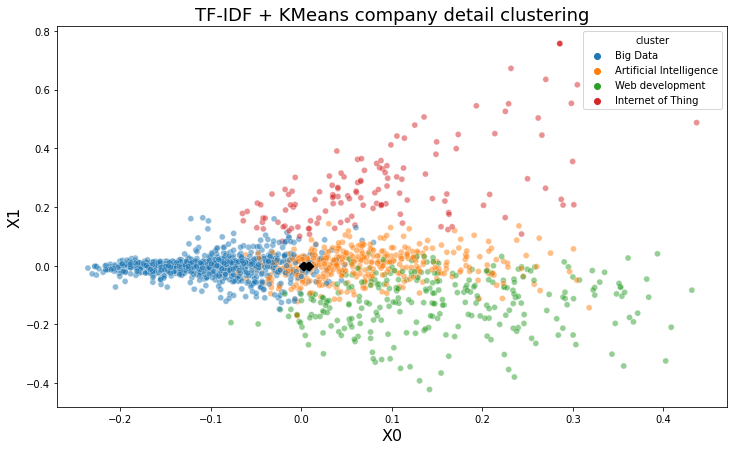

In [177]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans company detail clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
# plt.scatter(x0, x1, c=clusters)
sns.scatterplot(data=df1, x='x0', y='x1', hue='cluster', alpha=0.5)
centroids = kmeans.cluster_centers_
# centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='D', c='black')
plt.show()

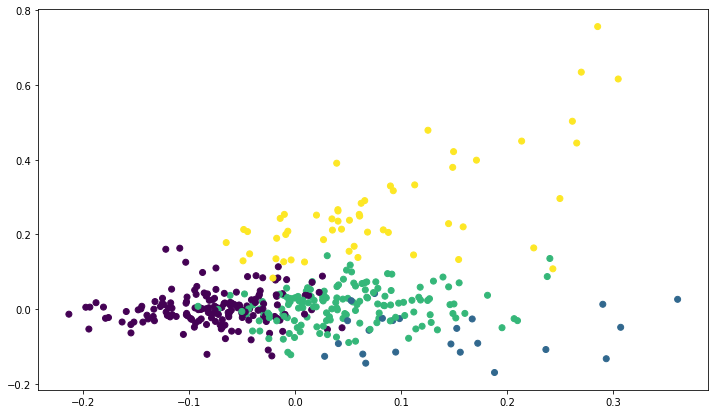

In [178]:
plt.figure(figsize=(12, 7))
plt.scatter(df1.iloc[100: 500]['x0'], df1.iloc[100: 500]['x1'], c=clusters[100: 500])
plt.show()

In [176]:
import random
for i in range(5):
  ind_sample = random.randint(0, len(df1))
  print(df.iloc[ind_sample]['รายละเอียดธุรกิจ'])
  print(f'cluster label: {clusters[ind_sample]}')
  print(f"Category: {df1.iloc[ind_sample]['cluster']}")
  print()


บริการ วางระบบคอมพิวเตอร์และรับจ้างเขียนโปรแกรมคอมพิวเตอร, รับเขียนโปรแกรมทุกอย่าง, รับทำ SEO เพื่อช่วยให้เว็บมีอันดับที่ดีในส่วนผลการค้นหาของ Search Engine (Google), รับทำเว็บไซต์ในแบบที่คุณต้องการ มีเอกลักษณ์ ใช้งานง่าย มีประสิทธิภาพสูง
cluster label: 1
Category: Web development

บริการรับจ้างพัฒนาระบบถ่ายภาพเสมือนจริง (Google Street View, Google My Business, Virtual Reality Web, Photography, Drone Photography, TEEDD360 Travel)
cluster label: 0
Category: Big Data

บริการแพลทฟอร์มออนไลน์ แพล็ตฟอร์มเล่าเรื่องราว ประสบการณ์ ความคิด ชีวิต ความรัก เล่าเรื่อง - อ่านเรื่อง - แชร์เรื่อง
cluster label: 3
Category: Internet of Thing

บริการจัดทำโปรแกรมเว็บเพจและเครือข่ายตามวัตถุประสงค์ผู้ใช้ Develop ERP System to fit your business, E-Commerce Solutions with SEO, IT Consultant and Outsource Services, Open Source Solutions
cluster label: 2
Category: Artificial Intelligence

บริการออกแบบ วางแผน จัดทำ ติดตั้ง โปรแกรมซอฟแวร์ คอมพิวเตอร์, ออกแบบและจัดทำเว็บไซต์, โซลูชั่นฐานข้อมูล, พัฒนาแอพพลิเคชัน, 